# BIGMART SALES DATA

*BigMart Sales Data provides a detailed view of retail operations, including item
specifics, outlet details, and sales labels. This dataset empowers businesses to
strategically tailor product modifications and marketing efforts by understanding
customer preferences and optimizing resources based on **outlet types** and sales
trends.
With insights into diverse factors such as **outlet size**, location, and establishment
yearr, businesses can make informed decisions to enhance customer engagement
and maximize the impact of their retail strategs*s.

# Objective:

The primary objective of the BigMart Sales Data project is to analyze and leverage the dataset to draw meaningful insights about retail operations. By understanding the various factors influencing sales—such as outlet size, location, establishment year, item characteristics, and outlet type—businesses can enhance customer engagement and optimize retail strategies. The goal is to identify trends, predict sales patterns, and make informed decisions to maximize profits and improve customer satisfaction.

# Description of the Columns:

**Item_Identifier:** Unique product ID

**Item_Weight:** Weight of product

**Item_Fat_Content:** Whether the product is low fat or not

**Item_Visibility:** The % of total display area of all products in a store allocated to the particular product

**Item_Type:** The category to which the product belongs

**Item_MRP:** Maximum Retail Price (list price) of the product

**Outlet_Identifier:** Unique store ID

**Outlet_Establishment_Year**: The year in which store was established

**Outlet_Size:** The size of the store in terms of ground area covered

**Outlet_Location_Type:** The type of city in which the store is located

**Outlet_Type:** Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales:** Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset

In [164]:
data= pd.read_csv('Train.csv')

In [109]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


# Exploratory Data Analysis

In [110]:
data.shape

(8523, 12)

In [111]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [112]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

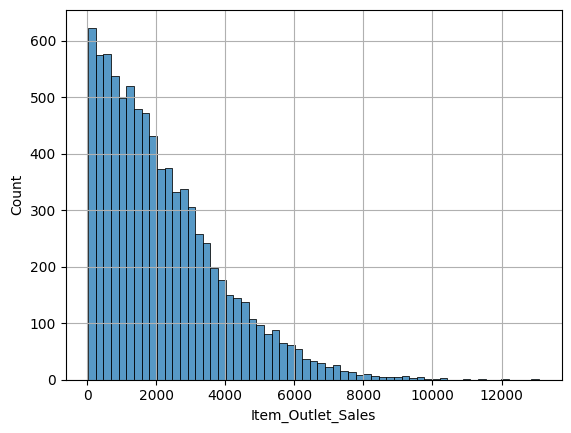

In [113]:
sns.histplot(data['Item_Outlet_Sales'])
plt.grid()

**check categorial columns**

In [114]:
categorial_features = data.select_dtypes(include=[object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


**check numerical columns**



In [115]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


# Data Cleaning

**Finding Missing values**

In [116]:
# check the missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Some observations:**

`Item_Visibility` has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

`Outlet_Establishment_Years` vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

The lower ‘count’ of `Item_Weight` and `Outlet_Size` confirms the findings from the missing value check.

In [117]:
unique_counts = data.nunique()
unique_counts

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores. Another thing that should catch attention is that `Item_Type` has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable

**percentage of  missing data to the total record of the data**

In [118]:
missing_values = (1606/len(data))*100 
print('Missing data %',round(missing_values))

Missing data % 19


as the data has 19% of data is missing so we can try to fill this data.

In [119]:
# Filling missing values with the mean for 'Item_Weight'
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace= True)

# Filling missing values for 'Outlet_Size' with the most frequent value
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [120]:
# check the missing values again
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**check duplicate values**

In [121]:
# to sum how many duplicate values present in df
data.duplicated().sum()

np.int64(0)

In [122]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Standardize categorical data:**

  Ensure uniformity in labels for `Item_Fat_Content` (e.g., 'Low Fat' vs 'low fat' vs 'LF')

In [123]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [124]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [125]:
data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [126]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [127]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [128]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**frequency of categories**

In [129]:
for col in categorial_features:
    print('\n column: ',col)
    print(data[col].value_counts())


 column:  Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

 column:  Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

 column:  Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

 column:  Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928


### Distribution of numerical features:

 
Analyzing the distribution of numerical features is essential for understanding the underlying patterns and spread of the data. In this section, we explore key numerical variables such as `Item_MRP`, `Item_Visibility`, `Item_Weight`, `Item_Outlet_Sales` and `Outlet_Establishment_Year`. This analysis provides insights into the central tendency, variability, and potential outliers that may impact sales performance. By examining the distributions, we can better understand the data's characteristics and identify any anomalies or trends that could influence BigMart's retail strategy. Visualizations such as histograms and boxplots will help illustrate these distributions effectively.

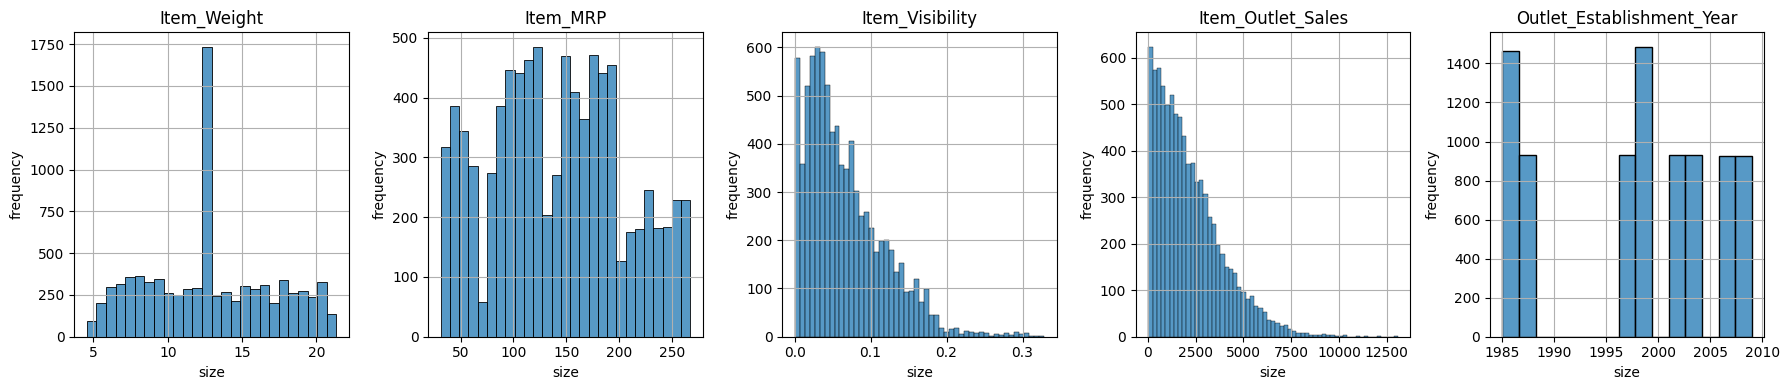

In [130]:
# Creating a 1x5 grid of subplots for horizontal arrangement
plt.figure(figsize=(18, 4))

plt.subplot(1, 5, 1)  # First plot in a row of 5
sns.histplot(data['Item_Weight'], edgecolor='k')
plt.title('Item_Weight')
plt.xlabel('size')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1, 5, 2)  # Second plot
sns.histplot(data['Item_MRP'], edgecolor='k')
plt.title('Item_MRP')
plt.xlabel('size')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1, 5, 3)  # Third plot
sns.histplot(data['Item_Visibility'], edgecolor='k')
plt.title('Item_Visibility')
plt.xlabel('size')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1, 5, 4)  # Fourth plot
sns.histplot(data['Item_Outlet_Sales'], edgecolor='k')
plt.title('Item_Outlet_Sales')
plt.xlabel('size')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1, 5, 5)  # Fifth plot
sns.histplot(data['Outlet_Establishment_Year'], edgecolor='k')
plt.title('Outlet_Establishment_Year')
plt.xlabel('size')
plt.ylabel('frequency')
plt.grid()

# Show the final horizontal layout
plt.tight_layout()
plt.show()


### Visualizing Item MRP, Visibility, and Outlet Sales:
  
These scatter plots explore the relationships between key numerical features, specifically `Item_MRP`, `Item_Visibility`, and `Item_Outlet_Sales`. By examining these interactions, we aim to understand how the visibility of products and their maximum retail price (MRP) affect sales in various outlets. This visual analysis allows us to identify trends, spot outliers, and assess the potential influence of these features on overall sales performancpisibility.

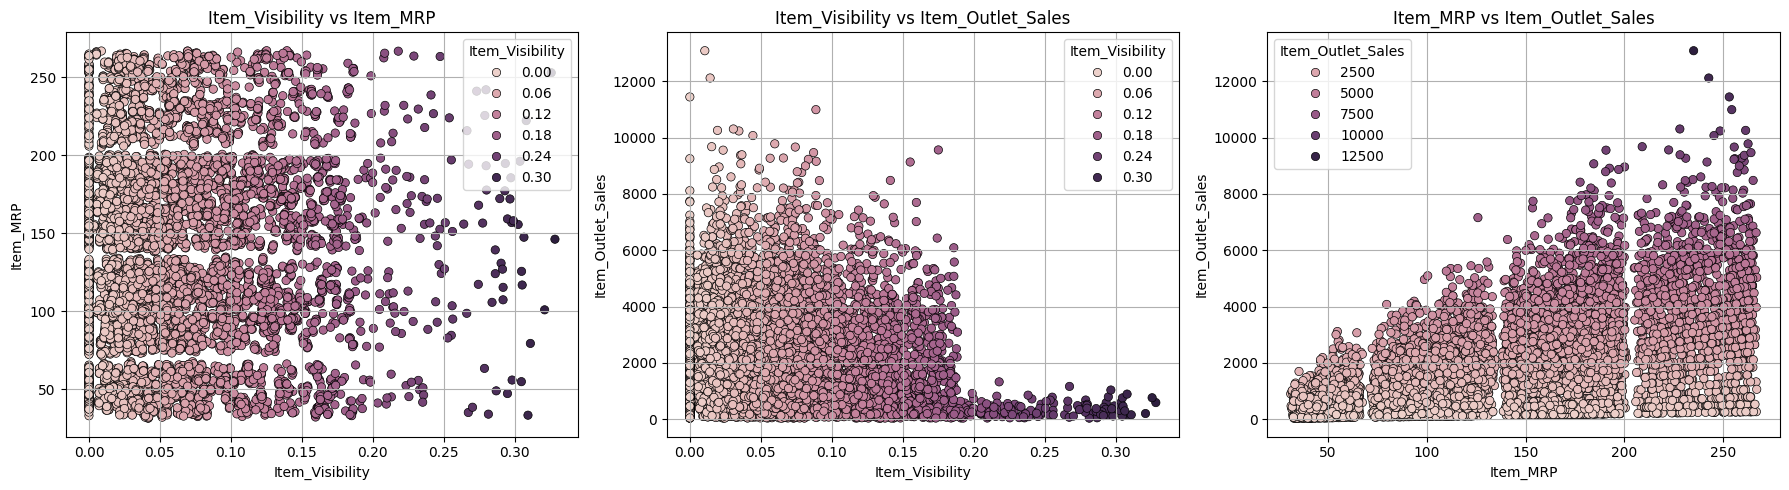

In [131]:
plt.figure(figsize=(18, 5))

# Scatter plot: Item_Visibility vs Item_MRP
plt.subplot(1, 3, 1)
sns.scatterplot(x='Item_Visibility', y='Item_MRP', data=data, edgecolor='k',hue='Item_Visibility')
plt.title('Item_Visibility vs Item_MRP')
plt.grid()

# Scatter plot: Item_Visibility vs Item_Outlet_Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=data, edgecolor='k',hue='Item_Visibility')
plt.title('Item_Visibility vs Item_Outlet_Sales')
plt.grid()

# Scatter plot: Item_MRP vs Item_Outlet_Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, edgecolor='k',hue='Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.grid()

plt.tight_layout()
plt.show()


# Item Fat_Content Column

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

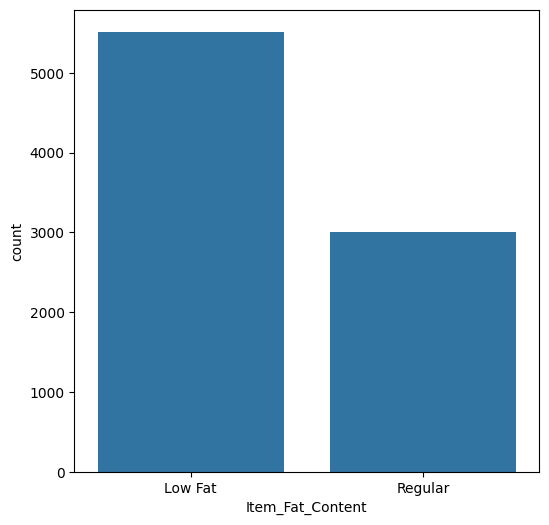

In [132]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data = data)

## Item Types Column

<Axes: xlabel='Item_Type', ylabel='count'>

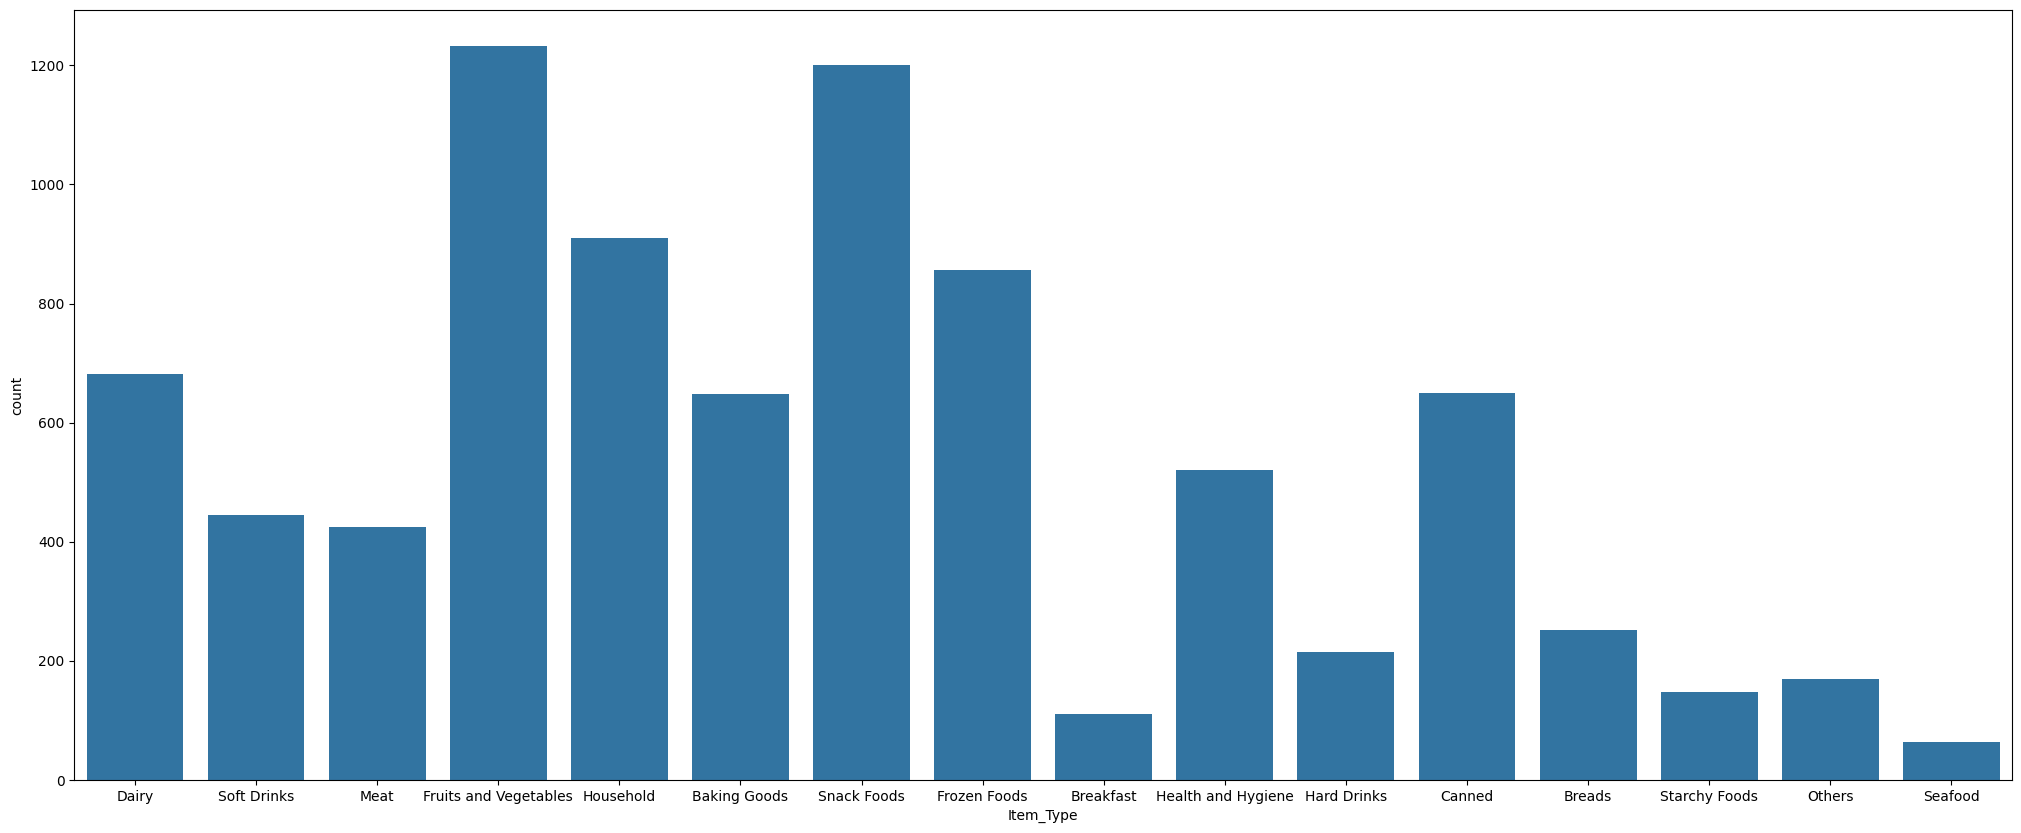

In [133]:
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type',data = data)

### Insights on Types of item impact on Sales:

**Create a broad category of Type of Item**

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [134]:
data['Item_Identifier'].head(5)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [135]:
# Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].str[0:2]

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

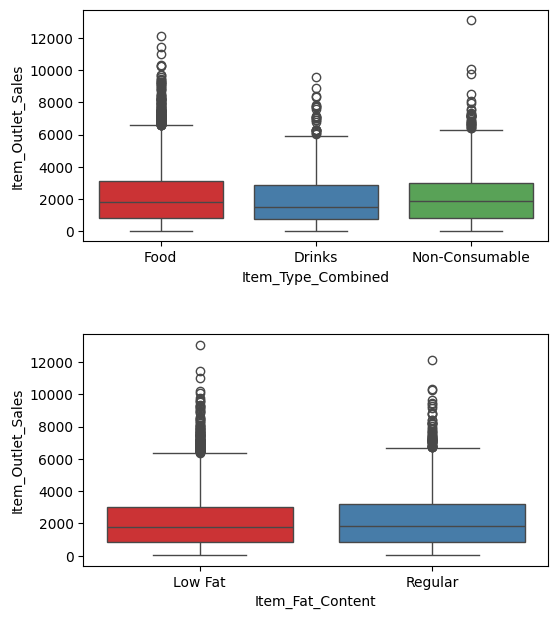

In [136]:
plt.figure(figsize = (6,4))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

### Conculsion:

`Non-Consumable items` seem to have the highest median sales among the categories (Food, Drinks, and Non-Consumables).

`Low Fat` items appear to have higher median sales than `Regular` fat items. This suggests that low-fat items might be more popular or higher selling overall in the market.

### **Insights on Establishment Year**:  

Older outlets tend to exhibit more stable sales patterns, while newer outlets may show greater variability in sales. The relationship between outlet age and sales performance suggests that long-established outlets are more consistent, potentially benefiting from customer loyalty and brand recognition. However, some newer outlets may outperform others depending on market conditions and location advantages.

In [137]:
data.index = data['Outlet_Establishment_Year']
data.index

Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
       ...
       2004, 2002, 2009, 2009, 1997, 1987, 2002, 2004, 2009, 1997],
      dtype='int64', name='Outlet_Establishment_Year', length=8523)

In [138]:
df = data.loc[:,['Item_Outlet_Sales']]

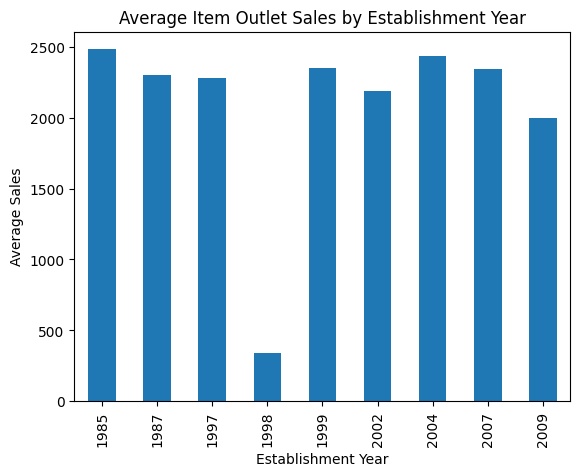

In [139]:
# Reset index to avoid any ambiguity
data = data.reset_index(drop=True)

# Group by 'Outlet_Establishment_Year' and plot the mean of 'Item_Outlet_Sales'
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(kind='bar')

plt.title('Average Item Outlet Sales by Establishment Year')
plt.ylabel('Average Sales')
plt.xlabel('Establishment Year')
plt.show()


**Determine the years of operation of a store:**

We wanted to make a new column depicting the years of operation of a store. This can be done as:

### **Insights on Sales Trends**: 

The analysis of factors such as `Outlet_Size`, `Outlet_Type`, and `Item_Type` reveals their substantial impact on `Item_Outlet_Sales`. Larger outlets tend to generate higher sales, likely due to greater product variety and customer traffic. Additionally, specific outlet types cater to different consumer needs, influencing purchasing behaviors. Similarly, certain item types resonate more with customers, driving sales fluctuations. By understanding these trends, businesses can make informed decisions to enhance product offerings and marketing strategies, ultimately boosting sales performance.


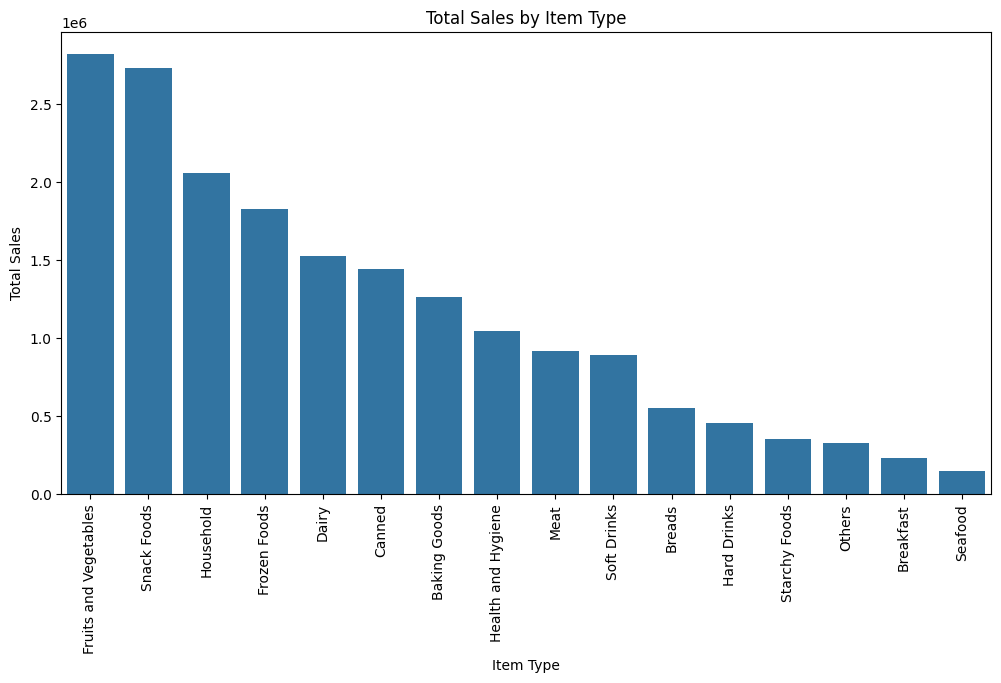

In [140]:
# Analyze customer preferences for product types (Item_Type) based on sales.
item_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.xticks(rotation=90)
plt.title('Total Sales by Item Type')
plt.ylabel('Total Sales')
plt.xlabel('Item Type')
plt.show()

**which product types have the highest average sales.**

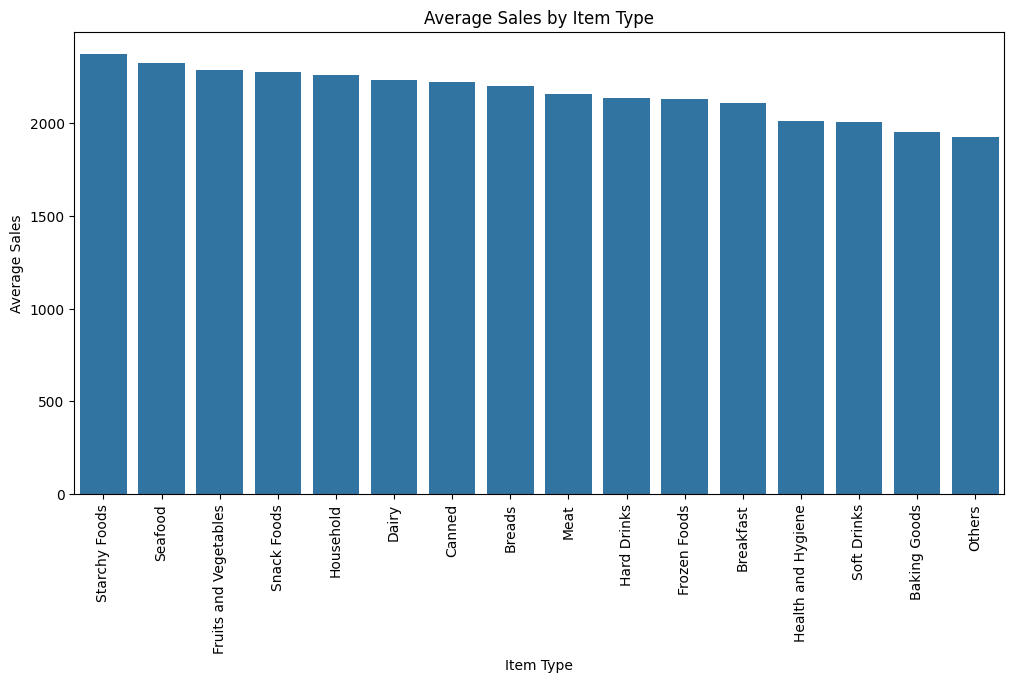

In [141]:
avg_item_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_item_sales.index, y=avg_item_sales.values)
plt.xticks(rotation=90)
plt.title('Average Sales by Item Type')
plt.ylabel('Average Sales')
plt.xlabel('Item Type')
plt.show()

###  **Compare Product Preferences Across Outlets**:  

Analyzing product preferences by grouping `Item_Type` and `Outlet_Type` reveals significant variations in customer choices across different outlets. This comparison highlights how specific items are favored in certain outlet types, with total or average sales providing insight into which products resonate more with customers in various shopping environments. Such insights can inform targeted marketing strategies and inventory management tailored to specific outlet profiles.

In [142]:
item_sales_by_outlet = data.groupby(['Item_Type', 'Outlet_Type'])['Item_MRP'].sum().unstack()
item_sales_by_outlet


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,10747.2358,53665.4614,8594.2014,8887.8378
Breads,4832.9448,22490.8084,3539.4032,4515.9634
Breakfast,2793.5128,9632.6468,1552.6140,1617.9230
Canned,10079.8990,59649.3094,10852.4690,10125.0496
Dairy,13539.3378,67179.6940,10638.9446,9918.4832
Frozen Foods,13750.4410,79348.3770,13253.7174,12206.3460
Fruits and Vegetables,21423.4146,117431.9880,18967.2918,20301.3866
Hard Drinks,2812.5444,19610.7546,3609.1174,3302.2602
Health and Hygiene,8964.0234,44050.7466,7339.9238,7671.1450


### Heatmap:

A heatmap is a great way to visualize this data to show which product types are more popular in which outlets.

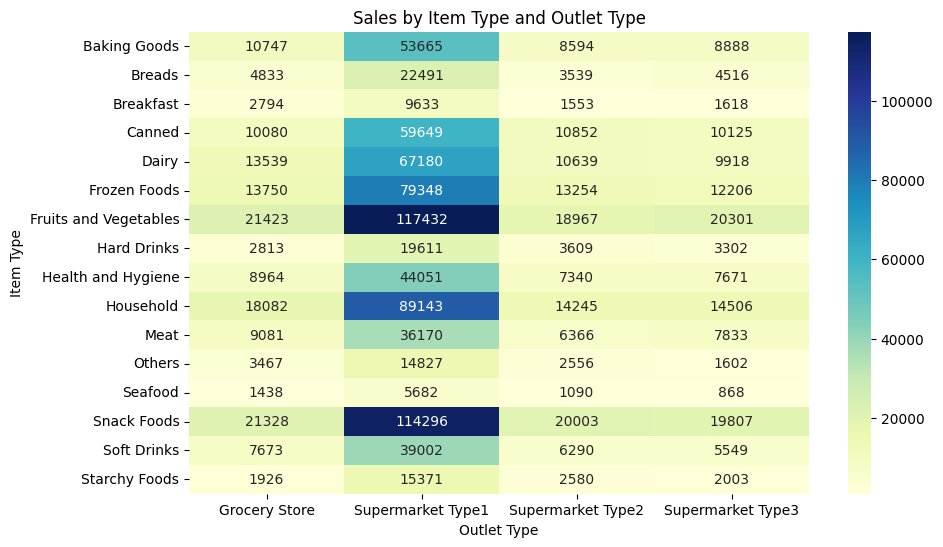

In [143]:
plt.figure(figsize=(10, 6))
sns.heatmap(item_sales_by_outlet, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Sales by Item Type and Outlet Type')
plt.ylabel('Item Type')
plt.xlabel('Outlet Type')
plt.show()


**Conclusion**:  

The analysis indicates that customers show a strong preference for fruits and vegetables, highlighting their popularity among consumers. Additionally, snack foods emerge as the category with the highest sales, suggesting a significant demand for these products across various outlets. Understanding these preferences can help retailers tailor their inventory and marketing strategies to better align with customer tastes and maximize sales opportunities.

### **Sales Distribution Analysis**:  

The analysis of sales distribution reveals how `Item_Outlet_Sales` varies across different product and outlet features. By examining factors such as `Item_Type`, `Outlet_Type`, and `Item_Fat_Content`, we can identify trends and patterns in sales performance. This exploration highlights which products are more successful in specific outlet contexts and provides insights into customer preferences, helping to optimize inventory and marketing strategies for improved sales outcomes.

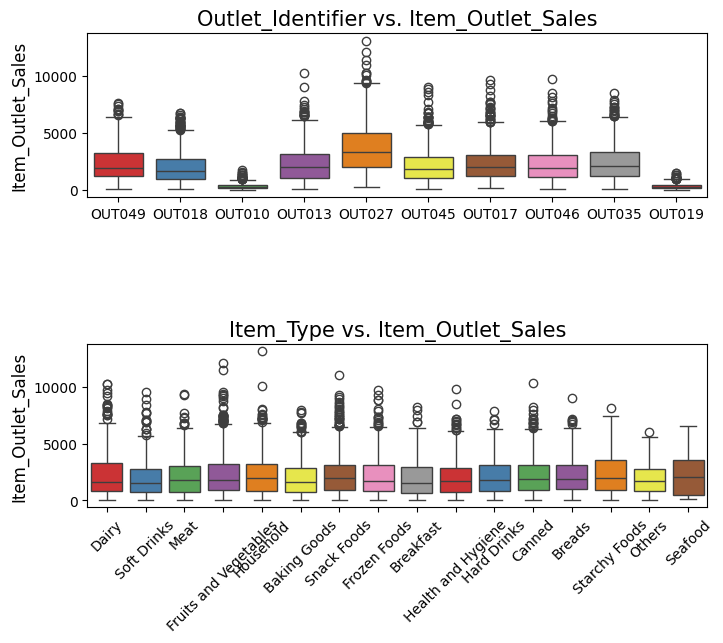

In [144]:
plt.figure(figsize = (8,6))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

### **Outlet Influence on Sales**:  

The analysis of outlet characteristics—specifically `Outlet_Type`, `Outlet_Size`, and `Outlet_Location_Type`—demonstrates their significant impact on sales performance. Different outlet types exhibit varying sales patterns, indicating that factors such as size and location play crucial roles in attracting customers and driving revenue. By understanding these influences, businesses can tailor their strategies to enhance performance, such as optimizing product placement and marketing efforts based on outlet attributes.

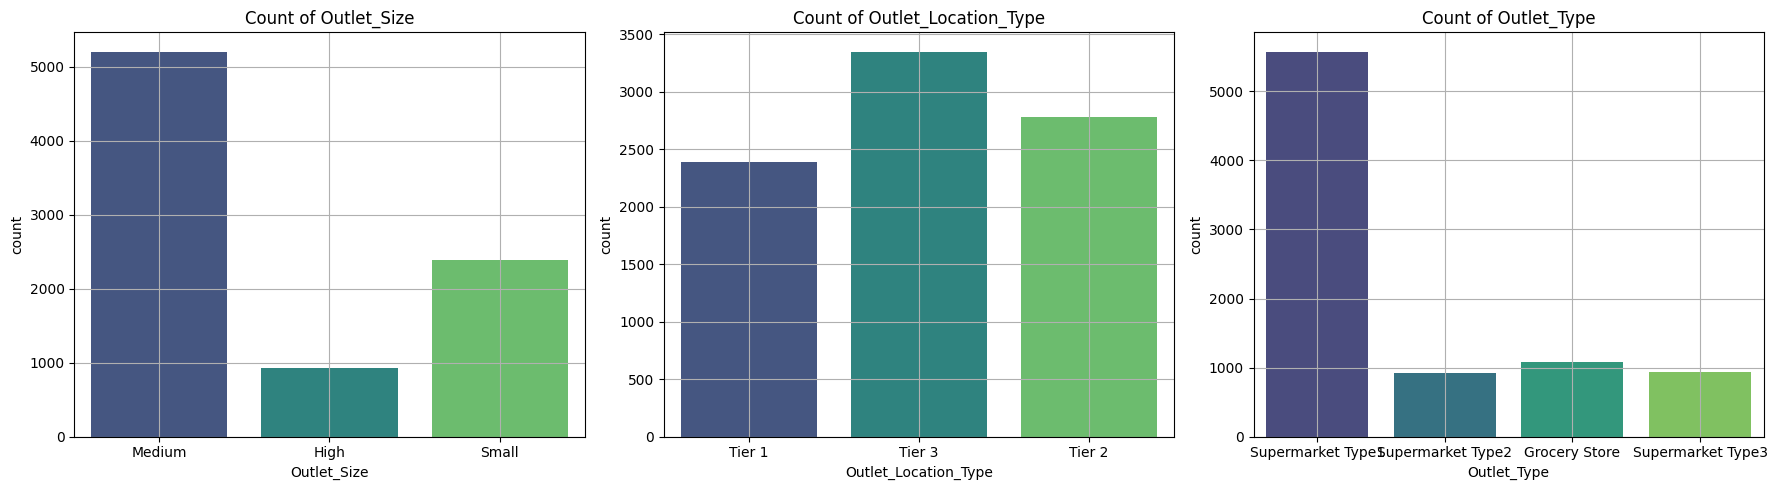

In [145]:
plt.figure(figsize=(18, 5))

# Count plot for Outlet_Size
plt.subplot(1, 3, 1)
sns.countplot(x='Outlet_Size', data=data, palette='viridis')
plt.title('Count of Outlet_Size')
plt.grid()

# Count plot for Outlet_Location_Type
plt.subplot(1, 3, 2)
sns.countplot(x='Outlet_Location_Type', data=data, palette='viridis')
plt.title('Count of Outlet_Location_Type')
plt.grid()

# Count plot for Outlet_Type
plt.subplot(1, 3, 3)
sns.countplot(x='Outlet_Type', data=data, palette='viridis')
plt.title('Count of Outlet_Type')
plt.grid()

plt.tight_layout()
plt.show()


### Conclusion :
The analysis of BigMart Sales Data reveals that product characteristics, such as Item_Type and Item_Fat_Content, as well as outlet-specific features like Outlet_Type and Outlet_Location_Type, significantly impact sales performance. Non-consumable and low-fat items show stronger sales trends, while supermarket-type outlets generally outperform grocery stores. However, the dataset contains missing values in critical fields such as Item_Weight and Outlet_Size, which require handling for more precise insights

# Label Encoding

In [146]:
encoder = LabelEncoder()

In [147]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])
data['Item_Type_Combined'] = encoder.fit_transform(data['Item_Type_Combined'])

In [148]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2


# Train Test Split

In [149]:
X = data.drop(columns=['Item_Outlet_Sales','Item_Type_Combined'],axis=1)
X.shape

(8523, 11)

In [150]:
y = data['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [151]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=22)

# ML Model Training using XGBoost Regressor

In [152]:
regressor = XGBRegressor()

In [153]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [154]:
y_pred = regressor.predict(x_test)

In [155]:
y_pred

array([1281.4614 , 2076.9026 , 3475.7097 ,  528.75946, 1086.0815 ,
        747.96246,  945.39777, 1930.0249 , 2293.4258 ,  295.41772,
       2023.5859 , 1117.7799 , 1556.4935 , 1769.1838 ,  952.5498 ,
        546.21063, 2622.5364 , 2356.9663 ,  320.82425, 2626.389  ],
      dtype=float32)

In [156]:
metrics.r2_score(y_test,y_pred)

0.5532091178436375

# Sales Prediction

In [157]:
data.head()
# 677,19.35,1,0.065891,10,167.0816,2,2007,2,1,1
# 250,6.89,1,0.136428,13,193.9820,8,1997,2,0,1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2


In [158]:
input = (156,9.30,0,	0.016047,	4,	249.8092,	9,	1999,	1,	0,	1)
new_input = np.asanyarray(input,dtype=float)
prediciton = regressor.predict(new_input.reshape(1,-1))
print(prediciton)

[3643.1802]


In [159]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [161]:
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6544,1399,16.500000,0,0.035626,8,93.1120,1,1987,0,2,1
1877,911,7.020000,0,0.081623,6,148.0734,2,2007,1,1,1
2933,688,12.857645,0,0.053972,13,141.2154,5,1985,1,2,3
8116,131,8.010000,0,0.117580,7,36.6532,0,1998,1,2,0
6240,54,6.130000,0,0.076721,4,59.4536,6,2004,2,1,1
461,154,15.850000,0,0.078999,3,38.6506,2,2007,1,1,1
7093,668,14.100000,0,0.113267,0,54.5956,8,1997,2,0,1
7893,437,9.600000,0,0.085434,0,105.0280,2,2007,1,1,1
5651,970,7.930000,0,0.005547,5,121.5414,6,2004,2,1,1
3047,861,12.650000,1,0.127283,5,191.7846,0,1998,1,2,0


In [165]:
data.iloc[6544]

Item_Identifier                           NCM41
Item_Weight                                16.5
Item_Fat_Content                        Low Fat
Item_Visibility                        0.035626
Item_Type                    Health and Hygiene
Item_MRP                                 93.112
Outlet_Identifier                        OUT013
Outlet_Establishment_Year                  1987
Outlet_Size                                High
Outlet_Location_Type                     Tier 3
Outlet_Type                   Supermarket Type1
Item_Outlet_Sales                        932.12
Name: 6544, dtype: object